In [1]:
import scipy.stats as stats
import matplotlib.pyplot as plot
import numpy
%matplotlib inline

In [2]:
with open("10.txt") as file:
    values = [float(line) for line in file]

Плотность распределения Парето:
$$p_{X_i}(x)=\frac{\alpha}{x^{\alpha+1}}I\{x>1\}$$

Для постороения Д.И. воспользуемся методом центральной статистики. Рассмотрим функцию $\phi(x)=\ln(x)$ и случайные величины $Y_i=\phi(X_i)$.

Тогда $$p_{Y_i}(y)=p_{X_i}(\phi^{-1}(y))\Bigl|\frac{d\phi^{-1}(y)}{dy}\Bigr|$$
$$\phi^{-1}(y)=\exp(y)$$
$$\frac{d\phi^{-1}(y)}{dy}=\exp(y)$$
$$p_{Y_i}(y)=\alpha e^{\alpha y}I\{y>0\}$$

Итак, $Y_i$ распределены экспоненциально.
Значит $\sum\limits^{n}_{i=1}Y_{i}$ имеет распределение $\Gamma(n,\alpha)$, а $\alpha\sum\limits^{n}_{i=1}Y_{i}$ имеет распределение $\Gamma(n,1)$, т.е. является центральной статистикой и позволяет построить доверительный интервал для $\alpha$.

$$\Biggl(\frac{u_{\frac{1-\gamma}{2}}}{\sum\limits^{n}_{i=1}\ln(X_{i})},\frac{u_{\frac{1+\gamma}{2}}}{\sum\limits^{n}_{i=1}\ln(X_{i})}\Biggr)$$
Здесь $\gamma$ - уровень довертия, а $u_{\frac{1-\gamma}{2}}$ и $u_{\frac{1+\gamma}{2}}$ - квантили соответствующих уровней из распределения $\Gamma(n,1)$

In [3]:
N = 1000
gamma = 0.9
down = [stats.gamma.ppf((1 - gamma) / 2, i) / numpy.sum(numpy.log(values[:i])) for i in range(1, N)]
up = [stats.gamma.ppf((1 + gamma) / 2, i) / numpy.sum(numpy.log(values[:i])) for i in range(1, N)]

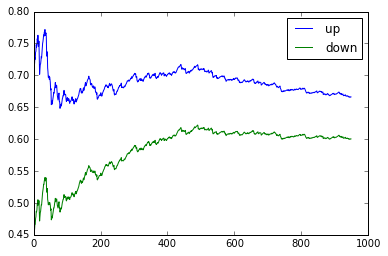

In [4]:
plot.plot(up[50:], label="up")
plot.plot(down[50:], label="down")
axis = plot.gca()
axis.legend()

По интервалу с вроятностью $0.9$ можно судить о гриницах, в которых лежит параметр $\alpha$.